In [128]:
import numpy as np
#%matplotlib inline
#import seaborn
import matplotlib.pyplot as plt
from scipy.integrate import odeint
#seaborn.set_context('talk')

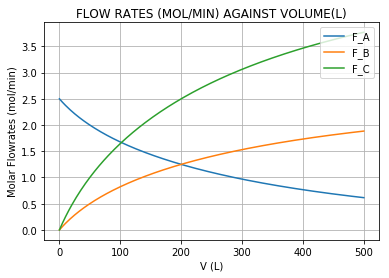

At reactor outlet, X_A = 0.7539494732813209


In [129]:
#Define initial conditions 
#QN3 FOGLER 6_4A
Fao=2.5#[mol/min]
Fbo=0
Fco=0
inivalues=[Fao,Fbo,Fco]

kc=0.0 #mass transfer coefficient

# Set up the differential equations
def memreact(z,V):  
    c_To=0.3046 #total conc. [mol/L]
    ka=0.0443 #rate constant [1/min]
    
    
    [Fa,Fb,Fc]=z #assignment of dependent variables to convenient variable names
    Ft=Fa+Fb+Fc #Total molar flowrate

    #Stoich
    ca=c_To*Fa/Ft
    cb=c_To*Fb/Ft
    cc=c_To*Fc/Ft
   
    #rate laws
    ra = -ka*(ca)
    rb = -ra
    rc = -2*ra
    
    #ODEs (mole balances for each and every species):
    dFadV = ra 
    dFbdV = rb - kc*cb
    dFcdV = rc
    
    return dFadV, dFbdV, dFcdV

# Setup ODE solver    
Vspan = np.linspace(0,500,200) # independent variable array: 200 pts from V=0 to V=500
solver = odeint(memreact,inivalues,Vspan) # solver output has format [X,y]
#print(solver)

# Plot results
plt.plot(Vspan,solver[:,0], label='F_A')
plt.plot(Vspan,solver[:,1], label='F_B')
plt.plot(Vspan,solver[:,2], label='F_C')
plt.xlabel('V (L)')
plt.ylabel('Molar Flowrates (mol/min)')
plt.legend(loc = 'upper right')
plt.title('FLOW RATES (MOL/MIN) AGAINST VOLUME(L)')
plt.grid(True)
plt.show()

# Calculate conversion of A at outlet and print to screen
Xout=(Fao-solver[-1,0])/Fao
print('At reactor outlet, X_A =',str(Xout))

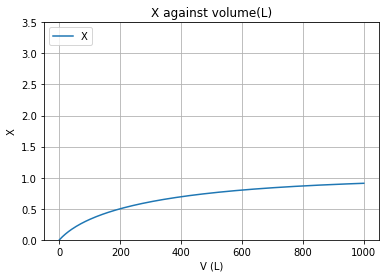

Reactor reaches a conversion of X = 90% at V = 946.6116893305074 L


In [130]:
#Problem 3(6_4 a continues getting conversion)
#Define all parameters
T = 400 #K
Fao = 2.5 #mol/min
Pao = 10 #atm
R = 8.314
Cao = Pao/(0.08206*T) #mol/L
k = 0.0001*np.exp(-85000/R*(1/T-1/323)) #min^-1
alpha = 0.000 #L-1
Vspan = [0,1000]
inivalues=[0,1.0] #initial value of X,y

# Set up the differenial equations
def pfr(z,V):  
    [X,y]=z #assignment of dependent variables to convenient variable names
    
    ca = Cao*(1- X)/(1 + 2*X)*y #stoichiometry
    neg_ra = k*(ca)#rate law
    
    #ODEs:
    dXdV = neg_ra/Fao  #mole balance
    dydV = -(alpha*(1+2*X))/(2*y) #Ergun equation
    return dXdV, dydV

# Setup ODE solver    
V = np.linspace(Vspan[0],Vspan[1],200) # independent variable array, increment 1
solver = odeint(pfr,inivalues,V) # solver has format [X,y]

X=solver[:,0]
y=solver[:,1]
f=(1+X)/y #Calculate f for each element in X and y vectors

# Plot results
plt.plot(V,X, label='X')
plt.xlabel('V (L)')
plt.title('X against volume(L)')
plt.ylabel('X')
plt.legend(loc = 'upper left')
plt.grid(True)
plt.ylim(0,3.5)
plt.show()

#From X vs. V, find V required for 90% conversion
V_requirement=np.interp(0.90,X,V)
print('Reactor reaches a conversion of X = 90% at V =',str(V_requirement),'L')


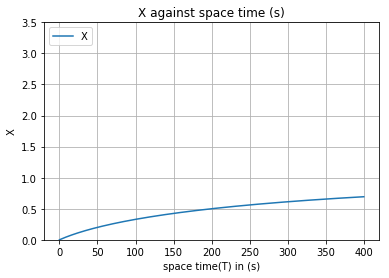

Reactor reaches a conversion of X = 90% at space time = 400.0 s


In [131]:
#Problem 3(6_4 a continues getting conversion)
#Define all parameters
T = 400 #K
Fao = 2.5 #mol/min
Pao = 10 #atm
R = 8.314
Cao = Pao/(0.08206*T) #mol/L
k = 0.0001*np.exp(-85000/R*(1/T-1/323)) #min^-1
alpha = 0.000 #L-1
Vspan = [0,1000]
inivalues=[0,1.0] #initial value of X,y

# Set up the differenial equations
def pfr(z,V):  
    [X,y]=z #assignment of dependent variables to convenient variable names
    
    ca = Cao*(1- X)/(1 + 2*X)*y #stoichiometry
    neg_ra = k*(ca)#rate law
    
    #ODEs:
    dXdV = neg_ra/Fao  #mole balance
    dydV = -(alpha*(1+2*X))/(2*y) #Ergun equation
    return dXdV, dydV

# Setup ODE solver    
V = np.linspace(Vspan[0],Vspan[1],200)*1/Fao # independent variable array, increment 1
solver = odeint(pfr,inivalues,V) # solver has format [X,y]

X=solver[:,0]
y=solver[:,1]
f=(1+X)/y #Calculate f for each element in X and y vectors

# Plot results
plt.plot(V,X, label='X')

plt.xlabel('space time(T) in (s)')
plt.ylabel('X')
plt.title('X against space time (s)')
plt.legend(loc = 'upper left')
plt.grid(True)
plt.ylim(0,3.5)
plt.show()

#From X vs. V, find V required for 90% conversion
V_requirement=np.interp(0.90,X,V)
print('Reactor reaches a conversion of X = 90% at space time =',str(V_requirement),'s')


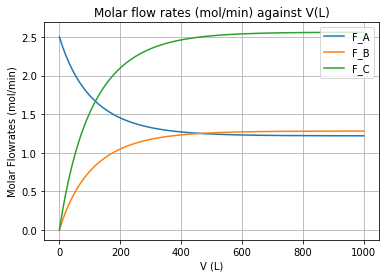

At reactor outlet, X_A = 0.5122300546654415


In [132]:
#### QN PROBLEM 4 A)
#Define initial conditions 
Fao=2.5 #[mol/min]
Fbo=0
Fco=0
inivalues=[Fao,Fbo,Fco]

kc=0.0 #mass transfer coefficient

# Set up the differential equations
def memreact(z,V):  
    c_To=0.3047#total conc. [mol/L]
    ka=0.043 #rate constant [1/min]
    Kc=0.025 #equilibrium constnat [mol/l]
    
    [Fa,Fb,Fc]=z #assignment of dependent variables to convenient variable names
    Ft=Fa+Fb+Fc #Total molar flowrate

    #Stoich
    ca=c_To*Fa/Ft
    cb=c_To*Fb/Ft
    cc=c_To*Fc/Ft
   
    #rate laws
    ra = -ka*(ca-(cb*cc**2/Kc))
    rb = -ra
    rc = -2*ra
    
    #ODEs (mole balances for each and every species):
    dFadV = ra 
    dFbdV = rb - kc*cb
    dFcdV = rc
    
    return dFadV, dFbdV, dFcdV

# Setup ODE solver    
Vspan = np.linspace(0,1000,200) # independent variable array: 200 pts from V=0 to V=1000
solver = odeint(memreact,inivalues,Vspan) # solver output has format [X,y]
#print(solver)

# Plot results
plt.plot(Vspan,solver[:,0], label='F_A')
plt.plot(Vspan,solver[:,1], label='F_B')
plt.plot(Vspan,solver[:,2], label='F_C')
plt.xlabel('V (L)')
plt.ylabel('Molar Flowrates (mol/min)')
plt.legend(loc = 'upper right')
plt.title('Molar flow rates (mol/min) against V(L)')
plt.grid(True)
plt.show()

# Calculate conversion of A at outlet and print to screen
Xout=(Fao-solver[-1,0])/Fao
print('At reactor outlet, X_A =',str(Xout))

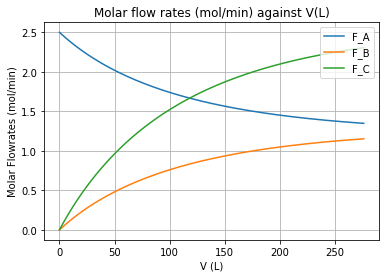

At reactor outlet, X_A = 0.46098 (90% of 0.5122) at volume 276.1 L  0.4609837782177536


In [133]:
#PROBLEM 4B) Getting volume at 90% of maximum conversion 

Fao=2.5 #[mol/min]
Fbo=0
Fco=0
inivalues=[Fao,Fbo,Fco]

kc=0.0 #mass transfer coefficient

# Set up the differential equations
def memreact(z,V):  
    c_To=0.3047#total conc. [mol/L]
    ka=0.043 #rate constant [1/min]
    Kc=0.025 #equilibrium constnat [mol/l]
    
    [Fa,Fb,Fc]=z #assignment of dependent variables to convenient variable names
    Ft=Fa+Fb+Fc #Total molar flowrate

    #Stoich
    ca=c_To*Fa/Ft
    cb=c_To*Fb/Ft
    cc=c_To*Fc/Ft
   
    #rate laws
    ra = -ka*(ca-(cb*cc**2/Kc))
    rb = -ra
    rc = -2*ra
    
    #ODEs (mole balances for each and every species):
    dFadV = ra 
    dFbdV = rb - kc*cb
    dFcdV = rc
    
    return dFadV, dFbdV, dFcdV

# Setup ODE solver    
Vspan = np.linspace(0,276.1,200) # independent variable array: 200 pts from V=0 to V=1000
solver = odeint(memreact,inivalues,Vspan) # solver output has format [X,y]
#print(solver)

# Plot results
plt.plot(Vspan,solver[:,0], label='F_A')
plt.plot(Vspan,solver[:,1], label='F_B')
plt.plot(Vspan,solver[:,2], label='F_C')
plt.xlabel('V (L)')
plt.title('Molar flow rates (mol/min) against V(L)')
plt.ylabel('Molar Flowrates (mol/min)')
plt.legend(loc = 'upper right')
plt.grid(True)
plt.show()

# Calculate conversion of A at outlet and print to screen 90% 0f 0.5122 ia 0.461
Xout=(Fao-solver[-1,0])/Fao
print('At reactor outlet, X_A = 0.46098 (90% of 0.5122) at volume 276.1 L ',str(Xout))

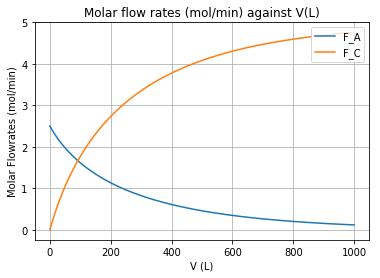

At reactor outlet, X_A = 0.9517737102324014


In [134]:
#QN PROBLEM 4 C) membrane present
#Define initial conditions 
Fao=2.5 #[mol/min]
Fbo=0
Fco=0
inivalues=[Fao,Fbo,Fco]

kc=0.08*60 #mass transfer coefficient into 1/min

# Set up the differential equations
def memreact(z,V):  
    c_To=0.3047#total conc. [mol/L]
    ka=0.043 #rate constant [1/min]
    Kc=0.025 #equilibrium constnat [mol/l]
    
    [Fa,Fb,Fc]=z #assignment of dependent variables to convenient variable names
    Ft=Fa+Fb+Fc #Total molar flowrate

    #Stoich
    ca=c_To*Fa/Ft
    cb=c_To*Fb/Ft
    cc=c_To*Fc/Ft
   
    #rate laws
    ra = -ka*(ca-cb*cc**2/Kc)
    rb = -ra
    rc = -2*ra
    
    #ODEs (mole balances for each and every species):
    dFadV = ra 
    dFbdV = rb - kc*cb
    dFcdV = rc
    
    return dFadV, dFbdV, dFcdV

# Setup ODE solver    
Vspan = np.linspace(0,1000,200) # independent variable array: 200 pts from V=0 to V=500
solver = odeint(memreact,inivalues,Vspan) # solver output has format [X,y]
#print(solver)

# Plot results
plt.plot(Vspan,solver[:,0], label='F_A')
plt.plot(Vspan,solver[:,2], label='F_C')
plt.xlabel('V (L)')
plt.title('Molar flow rates (mol/min) against V(L)')
plt.ylabel('Molar Flowrates (mol/min)')
plt.legend(loc = 'upper right')
plt.grid(True)
plt.show()

# Calculate conversion of A at outlet and print to screen
Xout=(Fao-solver[-1,0])/Fao
print('At reactor outlet, X_A =',str(Xout))

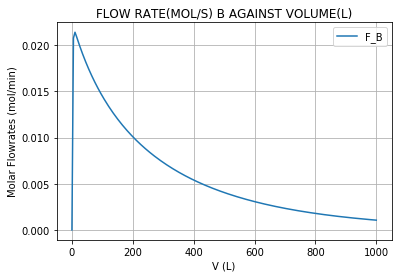

At reactor outlet, X_A = 0.9517737102324014


In [135]:
#QN 4C CONTINUES
# Plot results
plt.plot(Vspan,solver[:,1], label='F_B')
plt.xlabel('V (L)')
plt.ylabel('Molar Flowrates (mol/min)')
plt.legend(loc = 'upper right')
plt.title('FLOW RATE(MOL/S) B AGAINST VOLUME(L)')
plt.grid(True)
plt.show()

# Calculate conversion of A at outlet and print to screen
Xout=(Fao-solver[-1,0])/Fao
print('At reactor outlet, X_A =',str(Xout))

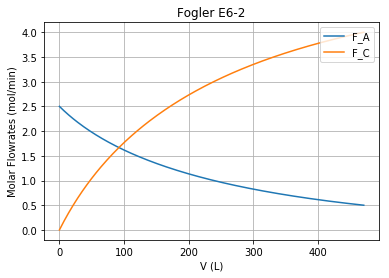

At reactor outlet, X_A = 0.80 for 470 L 0.8000979809203294


In [136]:
# Qn 4 c) Volume when there is a conversion with membrane present
# Set up the differential equations
def memreact(z,V):  
    c_To=0.3047#total conc. [mol/L]
    ka=0.043 #rate constant [1/min]
    Kc=0.025 #equilibrium constnat [mol/l]
    
    [Fa,Fb,Fc]=z #assignment of dependent variables to convenient variable names
    Ft=Fa+Fb+Fc #Total molar flowrate

    #Stoich
    ca=c_To*Fa/Ft
    cb=c_To*Fb/Ft
    cc=c_To*Fc/Ft
   
    #rate laws
    ra = -ka*(ca-cb*cc**2/Kc)
    rb = -ra
    rc = -2*ra
    
    #ODEs (mole balances for each and every species):
    dFadV = ra 
    dFbdV = rb - kc*cb
    dFcdV = rc
    
    return dFadV, dFbdV, dFcdV

# Setup ODE solver    
Vspan = np.linspace(0,470.7,200) # independent variable array: 200 pts from V=0 to V=500
solver = odeint(memreact,inivalues,Vspan) # solver output has format [X,y]
#print(solver)

# Plot results
plt.plot(Vspan,solver[:,0], label='F_A')
plt.plot(Vspan,solver[:,2], label='F_C')
plt.xlabel('V (L)')
plt.ylabel('Molar Flowrates (mol/min)')
plt.legend(loc = 'upper right')
plt.title('Fogler E6-2')
plt.grid(True)
plt.show()

# Calculate conversion of A at outlet and print to screen
Xout=(Fao-solver[-1,0])/Fao
print('At reactor outlet, X_A = 0.80 for 470 L',str(Xout))